In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Generate 2 periodic signals based on initial parameters, compute the correlation and return the squared difference from a target correlation value
def corr_gen(pars, target_corr):
  # pars: Frequencies and amplitudes of the periodic signals
  f1, f2, f3, f4, a1, b1, a2, b2 = pars
  t = np.linspace(0, 1, 1000)
  # Each signal is a combination of 2 sine waves with lower and higher frequencies
  x1 = a1*np.sin(2 * np.pi * f1 * t) + a2*np.sin(2 * np.pi * f3 * t)
  x2 = b1*np.sin(2 * np.pi * f2 * t) + b2*np.sin(2 * np.pi * f4 * t)
  correlation = np.corrcoef(x1, x2)[0, 1]
  return (correlation - target_corr)**2

Signals 1-3 - Low Tension

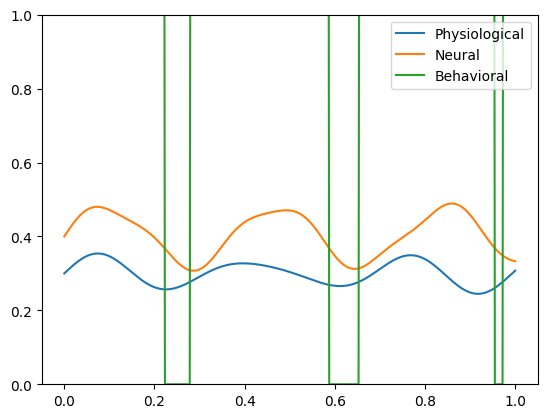

Optimized Frequencies: 2.999962215793293 2.6571469372282954 4.08073675559289 5.997121087646688
Optimized Amplitudes: 0.04026541335734787 0.07998941396032448 0.015 0.013280345740917906
Correlation12: 0.40008269537334984
Correlation13: 0.43800747753456926
Correlation23: 0.5200992539362943


In [ ]:
### Subfigures 1-3 - 1 - Physiological, 2 - Neural, 3 - Behavioral

# Choose target correlation 1-2
target_corr12 = 0.4

# Set the initial parameters for frequencies and amplitudes for corr_gen (f1, f2, f3, f4, a1, b1, a2, b2)
initial = [2, 6, 2, 6, 0.05, 0.05, 0.01, 0.01]

# Set the ranges of frequencies and amplitude for the signals
high_f = (4, 6)
low_f = (2, 3)
high_amp = (0.01,0.015)
low_amp = (0.04,0.08)

# Optimize the frequencies and the amplitudes with Constrained Optimization by Linear Approximation
result = minimize(corr_gen, initial, args=(target_corr12,), method='COBYLA', bounds=[low_f, low_f, high_f, high_f, low_amp, low_amp, high_amp, high_amp])

# Extract optimized parameters
f1o, f2o, f3o, f4o, a1o, b1o, a2o, b2o = result.x

# Set DC component
dc1 = 0.3
dc2 = 0.4

# Generate the optimized signals
t = np.linspace(0, 1, 1000)
subfigure1_data = dc1 + a1o * np.sin(2 * np.pi * f1o * t) + a2o * np.sin(2 * np.pi * f3o * t)
subfigure2_data = dc2 + b1o * np.sin(2 * np.pi * f2o * t) + b2o * np.sin(2 * np.pi * f4o * t)

# Create the behavioral synchrony binary signal
subfigure3_data=np.zeros(1000)
n_ones = 700 # Number of synchrony points
ratio_ones = 1 # Higher value yields higher correlation
pos=-int(n_ones*ratio_ones)
neg=int(n_ones*(1-ratio_ones))
# Transform to 1 either the highest or the lowest parts of signals 1 and 2
subfigure3_data[subfigure1_data.argsort()[pos:][::-1]]=1
subfigure3_data[subfigure2_data.argsort()[pos:][::-1]]=1
subfigure3_data[subfigure1_data.argsort()[1:neg][::-1]]=1
subfigure3_data[subfigure2_data.argsort()[1:neg][::-1]]=1

# Plot the signals
plt.plot(t, subfigure1_data, label='Physiological')
plt.plot(t, subfigure2_data, label='Neural')
plt.plot(t, subfigure3_data, label='Behavioral')
plt.ylim(0,1)
plt.legend()
plt.show()

# Print the optimized parameters and  correlation
print("Optimized Frequencies:", f1o, f2o, f3o, f4o)
print("Optimized Amplitudes:", a1o, b1o, a2o,b2o)
print("Correlation12:", np.corrcoef(subfigure1_data, subfigure2_data)[0, 1])
print("Correlation13:", stats.pointbiserialr(subfigure1_data, subfigure3_data)[0])
print("Correlation23:", stats.pointbiserialr(subfigure2_data, subfigure3_data)[0])


Signals 4-6 - High Tension

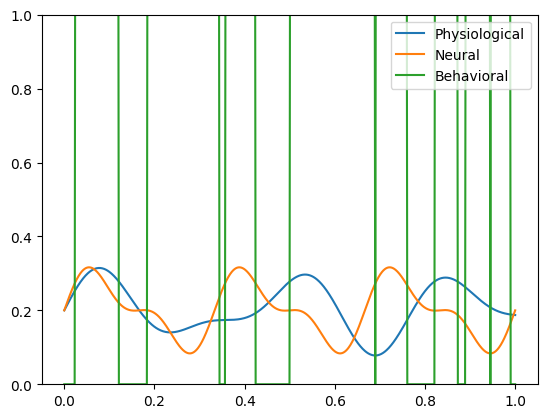

Optimized Frequencies: 2.525889663620287 2.9999893720791153 4.000043531097403 5.999999999999999
Optimized Amplitudes: 0.07830925563258082 0.08773079594933202 0.043969007161615656 0.04673126151542992
Correlation12: 0.05007080244083538
Correlation13: -0.16951298738180773
Correlation23: -0.13412853284503928


In [ ]:
### Subfigures 4-6 - 4 - Physiological, 5 - Neural, 6 - Behavioral

# Choose target correlation 4-5
target_corr45 = 0.05

# Set the initial parameters for frequencies and amplitudes for corr_gen (f1, f2, f3, f4, a1, b1, a2, b2)
initial = [2, 6, 2, 6, 0.05, 0.05, 0.01, 0.01]

# Set the ranges of frequencies and amplitude for the signals
high_f = (4, 6)
low_f = (2, 3)
high_amp = (0.03,0.05)
low_amp = (0.06,0.09)

# Optimize the frequencies and the amplitudes with Constrained Optimization by Linear Approximation
result = minimize(corr_gen, initial, args=(target_corr45,), method='COBYLA', bounds=[low_f, low_f, high_f, high_f, low_amp, low_amp, high_amp, high_amp])

# Extract optimized parameters
f1o, f2o, f3o, f4o, a1o, b1o, a2o, b2o = result.x

# Set DC component
dc1 = 0.2
dc2 = 0.2

# Generate the optimized signals
t = np.linspace(0, 1, 1000)
subfigure4_data = ac1 + a1o * np.sin(2 * np.pi * f1o * t) + a2o * np.sin(2 * np.pi * f3o * t)
subfigure5_data = ac2 + b1o * np.sin(2 * np.pi * f2o * t) + b2o * np.sin(2 * np.pi * f4o * t)

# Create the behavioral synchrony binary signal
subfigure6_data=np.zeros(1000)
n_ones = 500 # Number of synchrony points
ratio_ones = 0.4 # Higher value yields higher correlation
pos=-int(n_ones*ratio_ones)
neg=int(n_ones*(1-ratio_ones))
# Transform to 1 either the highest or the lowest parts of signals 1 and 2
subfigure6_data[subfigure4_data.argsort()[pos:][::-1]]=1
subfigure6_data[subfigure5_data.argsort()[pos:][::-1]]=1
subfigure6_data[subfigure4_data.argsort()[1:neg][::-1]]=1
subfigure6_data[subfigure5_data.argsort()[1:neg][::-1]]=1

# Plot the signals
plt.plot(t, subfigure4_data, label='Physiological')
plt.plot(t, subfigure5_data, label='Neural')
plt.plot(t, subfigure6_data, label='Behavioral')
plt.ylim(0,1)
plt.legend()
plt.show()

# Print the optimized parameters and  correlation
print("Optimized Frequencies:", f1o, f2o, f3o, f4o)
print("Optimized Amplitudes:", a1o, b1o, a2o,b2o)
print("Correlation45:", np.corrcoef(subfigure4_data, subfigure5_data)[0, 1])
print("Correlation46:", stats.pointbiserialr(subfigure4_data, subfigure6_data)[0])
print("Correlation56:", stats.pointbiserialr(subfigure5_data, subfigure6_data)[0])

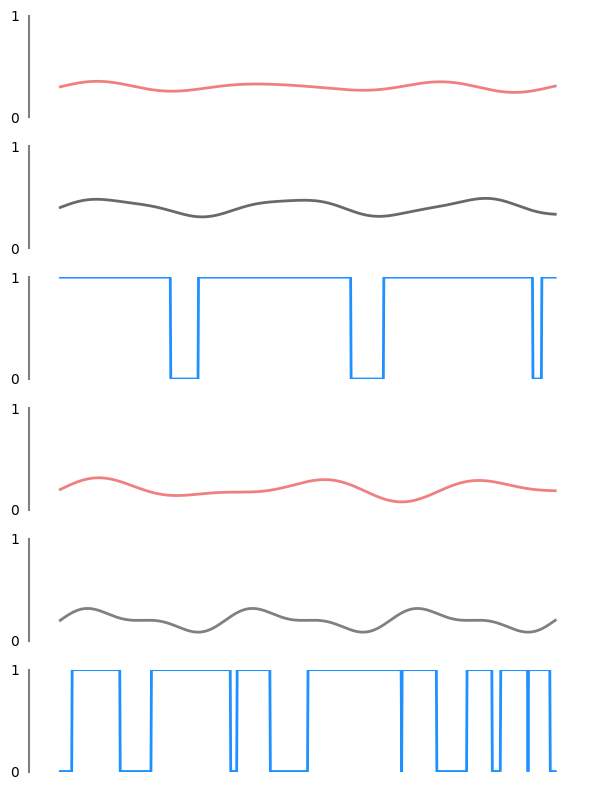

In [ ]:
# Create the figure and subplots
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, sharex=True, figsize=(6, 8))

# Set y-axis limits and labels, remove ticks and spines
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['0', '1'])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['left'].set_linewidth(1.5)
    ax.get_xaxis().set_visible(False)
    ax.tick_params(axis='y', which='both', left=False)

# Customize the left spine
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.spines['left'].set_position(('outward', 5))
    ax.spines['left'].set_color('gray')

# Subfigure 1 - Heart - Red
ax1.plot(t, subfigure1_data, color='lightcoral', linewidth=2, alpha=1.0)

# Subfigure 2 - Neural - Grey
ax2.plot(t, subfigure2_data, color='dimgray', linewidth=2, alpha=1.0)

# Subfigure 3 - Behavioral - Blue
ax3.plot(t, subfigure3_data, color='dodgerblue', linewidth=2, alpha=1.0)

# Subfigure 4 - Heart - Red
ax4.plot(t, subfigure4_data, color='lightcoral', linewidth=2, alpha=1.0)

# Subfigure 5 - Neural - Grey
ax5.plot(t, subfigure5_data, color='gray', linewidth=2, alpha=1.0)

# Subfigure 6 - Behavioral - Blue
ax6.plot(t, subfigure6_data, color='dodgerblue', linewidth=2, alpha=1.0)

plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

# Calculate correlations
corr_12 = np.corrcoef(subfigure1_data, subfigure2_data)[0, 1]
corr_13 = stats.pointbiserialr(subfigure1_data, subfigure3_data)[0]
corr_23 = stats.pointbiserialr(subfigure2_data, subfigure3_data)[0]

print(f"r12: {corr_12:.2f}")
print(f"r13: {corr_13:.2f}")
print(f"r23: {corr_23:.2f}")

# Calculate correlations
corr_45 = np.corrcoef(subfigure4_data, subfigure5_data)[0, 1]
corr_46 = stats.pointbiserialr(subfigure4_data, subfigure6_data)[0]
corr_56 = stats.pointbiserialr(subfigure5_data, subfigure6_data)[0]

print(f"r45: {corr_45:.2f}")
print(f"r46: {corr_46:.2f}")
print(f"r56: {corr_56:.2f}")

r12: 0.40
r13: 0.44
r23: 0.52
r45: 0.05
r46: -0.17
r56: -0.13
